In [1]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

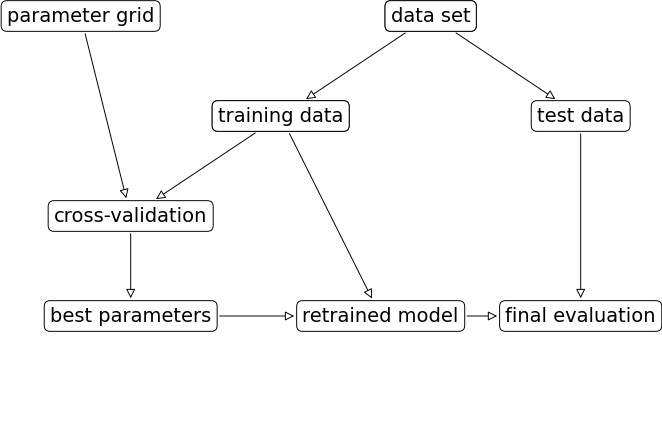

In [11]:
mglearn.plots.plot_grid_search_overview()

In [12]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [15]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

In [17]:
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "max_features": ["sqrt", 9, None],

}
# we are going to end up with 48 model results (4 * 4 * 3)

gs = GridSearchCV(rf, param_grid=param_grid, n_jobs=-1, return_train_score=True)

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [21]:
# Carry out the search 
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 9, None],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [22]:
# Get the best hyperparameter values
gs.best_params_

{'max_depth': 20, 'max_features': None, 'n_estimators': 200}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [23]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.960375,0.144574,0.070608,0.016779,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.875180,0.874605,...,0.876546,0.004314,48,0.883647,0.881850,0.889688,0.880636,0.887251,0.884614,0.003379
1,4.622365,0.234616,0.124813,0.038008,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880932,0.885821,...,0.881206,0.004034,45,0.893068,0.891558,0.890407,0.890487,0.887754,0.890655,0.001740
2,8.809819,0.357319,0.186561,0.019434,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880069,0.885534,...,0.882702,0.002925,39,0.890910,0.888322,0.890407,0.889480,0.891278,0.890079,0.001066
3,18.380546,0.294088,0.437922,0.068228,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880932,0.886396,...,0.882184,0.003436,43,0.889400,0.890047,0.888753,0.890774,0.889912,0.889777,0.000675
4,1.741209,0.198153,0.061961,0.018694,5,9,10,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.878056,0.882082,...,0.880343,0.002912,46,0.891198,0.893068,0.887099,0.888977,0.890990,0.890266,0.002046
5,8.703837,0.451596,0.144091,0.022977,5,9,50,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.880069,0.885246,...,0.882644,0.002071,40,0.894362,0.894290,0.894003,0.893938,0.892500,0.893819,0.000679
6,18.644886,1.545629,0.324164,0.050061,5,9,100,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.885246,0.884958,...,0.885175,0.001460,38,0.894075,0.894937,0.894075,0.894514,0.894082,0.894336,0.000345
7,44.916158,0.796245,0.507446,0.090941,5,9,200,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.884095,0.883520,...,0.885405,0.002787,37,0.894506,0.895657,0.894722,0.893866,0.895520,0.894854,0.000664
8,3.150247,0.444313,0.061514,0.010223,5,None,10,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.868852,0.878919,...,0.878618,0.005425,47,0.884726,0.889688,0.889904,0.892716,0.892860,0.889979,0.002949
9,17.887766,1.182721,0.181307,0.019809,5,None,50,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.872879,0.880932,...,0.882357,0.005754,42,0.888825,0.894003,0.892708,0.894442,0.895880,0.893171,0.002398


Let's look at only the most relevant rows

In [27]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [28]:
# Best score

# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

In [34]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()


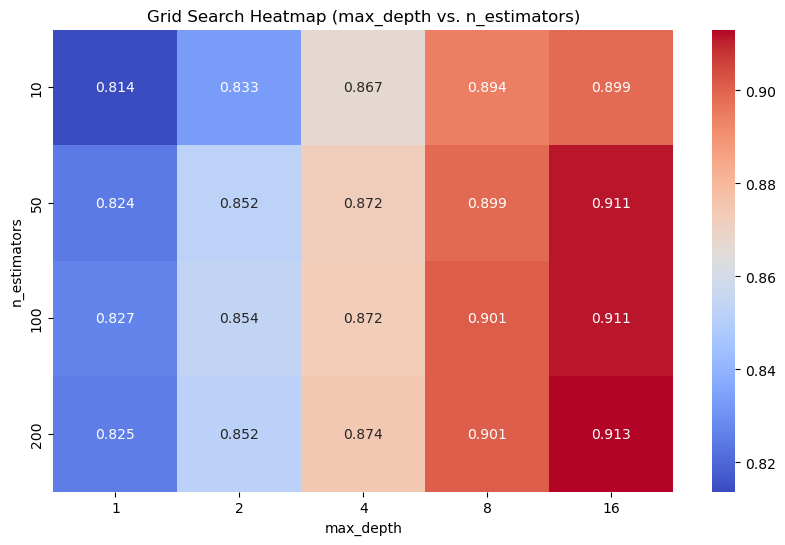

In [38]:
# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [1,2,4,8,16],
    "n_estimators": [10,50,100,200]
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.